In [5]:
pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/90.1 kB ? eta -:--:--
   ------------------------------------ --- 81.9/90.1 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 90.1/90.1 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.6/8.9 MB 11.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/8.9 MB 18.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.3/8.9 MB 20.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/8.9 MB 16.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.9/8.9 MB 22.4 MB/s eta 0:00:01
   ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.4 requires Cython!=0.29.18,!=0.29.31,>=0.29, which is not installed.


In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [4]:
X = StandardScaler().fit_transform(digits.data)

In [5]:
y = digits.target

In [6]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 42)
X_tsne = tsne.fit_transform(X)

In [7]:
X_tsne

array([[-39.039124 , -30.140669 ],
       [-15.394278 ,  -2.8344002],
       [  5.7963943, -14.526552 ],
       ...,
       [  2.0320077,  -4.914854 ],
       [ 36.559425 ,  15.974087 ],
       [  7.484208 ,  -4.343908 ]], dtype=float32)

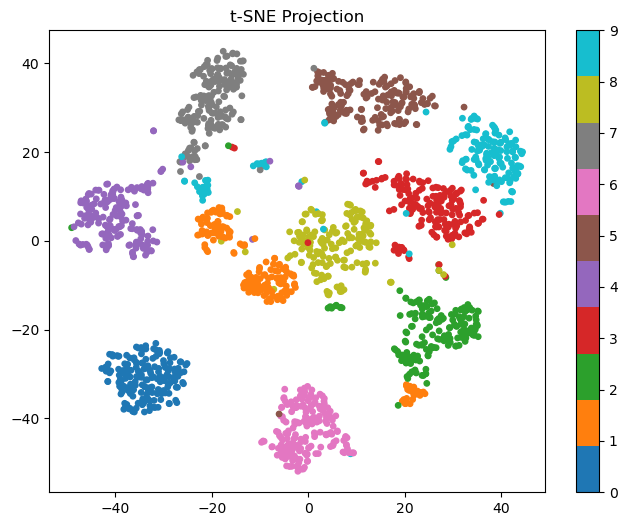

In [8]:
plt.figure(figsize= (8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15)
plt.title("t-SNE Projection")
plt.colorbar()
plt.show()

In [9]:
import sklearn
import umap

print("scikit-learn version:", sklearn.__version__)
print("UMAP version:", umap.__version__)

scikit-learn version: 1.7.1
UMAP version: 0.5.9.post2


In [44]:
umap_model = umap.UMAP(n_neighbors=25, min_dist=0.2, random_state=42)
X_umap = umap_model.fit_transform(X)

C:\Users\ashar\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


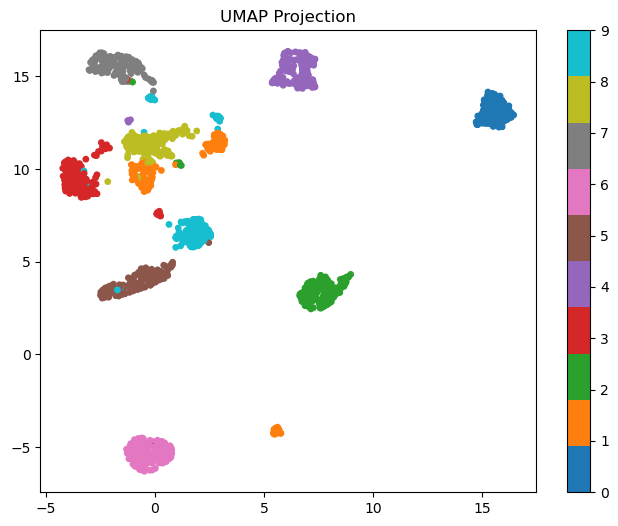

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=15)
plt.title("UMAP Projection")
plt.colorbar()
plt.show()

In [12]:
X = digits.data
y = digits.target  

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
umap_model = umap.UMAP(n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

C:\Users\ashar\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [33]:
clf = RandomForestClassifier(random_state=42, min_samples_split = 2, min_samples_leaf = 3)
clf.fit(X_train_umap, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred = clf.predict(X_test_umap)
acc = accuracy_score(y_test, y_pred)

In [35]:
print(f"✅ Accuracy using UMAP-transformed input: {acc:.4f}")

✅ Accuracy using UMAP-transformed input: 0.9806


In [36]:
clf_raw = RandomForestClassifier(random_state=42)
clf_raw.fit(X_train, y_train)
y_pred_raw = clf_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"⚠️ Accuracy using raw input: {acc_raw:.4f}")

⚠️ Accuracy using raw input: 0.9722


In [37]:
new_sample = X_test[0].reshape(1, -1)
new_sample_umap = umap_model.transform(new_sample)
prediction = clf.predict(new_sample_umap)
proba = clf.predict_proba(new_sample_umap)

print(f"🧾 Predicted class: {prediction[0]}")
print(f"🔢 Class probabilities: {proba}")

🧾 Predicted class: 6
🔢 Class probabilities: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [38]:
print(f"✅ Actual label: {y_test[0]}")


✅ Actual label: 6


In [30]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 297.0/544.4 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_umap)
sample_idx = 0
sample_input = X_test_umap[sample_idx].reshape(1, -1)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][sample_idx], sample_input)

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_umap, y, cv=5)

In [49]:
print("Accuracy using UMAP-transformed features:", scores.mean())

Accuracy using UMAP-transformed features: 0.97330547818013
